<a href="https://colab.research.google.com/github/aikorneev/ML_solutions/blob/main/PCA/Sem2_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1.1

In the file there is a set of synthetic data. The data describes 60 objects, each of which has 10 features. Your task is to switch to the new coordinates using principal components method and find the following parameters.

Preparations:

In [1]:
#connection to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import csv
import numpy as np
with open('/content/drive/My Drive/Digital culture/Semester2/task1.1.csv', 'r') as f:
    reader = csv.reader(f)
    X = list(reader)
X = np.array(X).astype(np.float64)

Enter the coordinate of the first object with respect to the first principal component:

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, svd_solver='full') 
X_transformed = pca.fit(X).transform(X)
X_transformed[0][0]

-14.279030887429187

Enter the coordinate of the first object with respect to the second principal component.

In [33]:
pca = PCA(n_components=2, svd_solver='full') 
X_transformed = pca.fit(X).transform(X)
X_transformed[0][1]

-16.393222518273596

Enter the fraction of variance explained when the first and the second principal components are used.

In [51]:
#the fraction of variance explained with respect to the number of PCs used
pca = PCA(n_components=X.shape[1], svd_solver='full')
X_transformed = pca.fit(X).transform(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance[1]

0.654177606799051

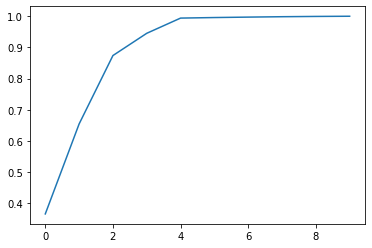

In [65]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(np.arange(X.shape[1]), explained_variance, ls = '-')

What minimal number of principal components are to be used, so that the fraction of variance explained will exceed 0.85

In [60]:
elem_num = next(x[0] for x in enumerate(explained_variance) if x[1] > 0.85)
#as far as python provide zero-based numbering one need to add 1
elem_num + 1

3

What number of groups the objects can be splitted in, if only the first and the second principal components are used?

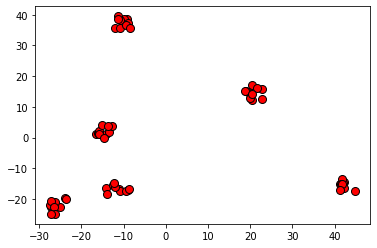

In [73]:
pca = PCA(n_components=2, svd_solver='full') 
X_transformed = pca.fit(X).transform(X)
plt.plot(X_transformed[:,0], X_transformed[:,1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

Plot shows 6 groups

# Task 1.2

In order to enter the ITMO Christmas party you must find the correct party logo. In order to get the logo picture you must reconstruct the initial logo using the first 10 principal components (all guests have got a score matrix and a loading matrix of the 10 first PCs).

In [76]:
with open('/content/drive/My Drive/Digital culture/Semester2/X_loadings_task1.2.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    X_load = list(reader)
X_load = np.array(X_load).astype(np.float64)

In [77]:
with open('/content/drive/My Drive/Digital culture/Semester2/X_reduced_task1.2.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    X_score = list(reader)
X_score = np.array(X_score).astype(np.float64)

X_score * X_load ^(T) = X

In [84]:
X = np.matmul(X_score, X_load.transpose())
X.shape

(100, 100)

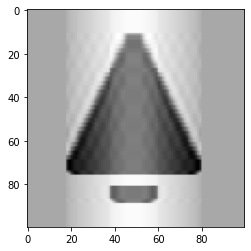

In [86]:
plt.imshow(X, cmap='Greys_r')